# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/BJIT Materials/Dataset/Merged Social Media Usage and Academic Factors Datasets  Combined (1).xlsx")

In [ ]:
df.columns

Index(['Age', 'Gender', 'Major',
       'Hours Spent on Social Media per Day (Average)',
       ' Primary Social Media Platform',
       'Frequency of Posting in social media',
       'Number of Friends  or Followers in social media',
       'Academic Performance: (categorical: Good, Average, Poor)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Age                                                       1019 non-null   int64  
 1   Gender                                                    1012 non-null   object 
 2   Major                                                     1001 non-null   object 
 3   Hours Spent on Social Media per Day (Average)             1019 non-null   float64
 4    Primary Social Media Platform                            1019 non-null   object 
 5   Frequency of Posting in social media                      1018 non-null   object 
 6   Number of Friends  or Followers in social media           1018 non-null   object 
 7   Academic Performance: (categorical: Good, Average, Poor)  1014 non-null   object 
dtypes: float64(1), int6

# Data Preprocessing

## Cleaning Columns

### Primary Social Media

In [ ]:
df[' Primary Social Media Platform'].unique()

array(['Instagram', 'Facebook', 'Twitter', 'LinkedIn', 'Snapchat',
       'TikTok', 'Youtube', 'WhatsApp ', 'X/Twitter', 'Whatsapp',
       'Reddit', 'YouTube'], dtype=object)

In [ ]:
# Replace close values with relevant ones
df[' Primary Social Media Platform'] = df[' Primary Social Media Platform'].replace('Youtube', 'YouTube')
df[' Primary Social Media Platform'] = df[' Primary Social Media Platform'].replace('X/Twitter', 'Twitter')
df[' Primary Social Media Platform'] = df[' Primary Social Media Platform'].replace('WhatsApp ', 'Whatsapp')

In [ ]:
df[' Primary Social Media Platform'].unique()

array(['Instagram', 'Facebook', 'Twitter', 'LinkedIn', 'Snapchat',
       'TikTok', 'YouTube', 'Whatsapp', 'Reddit'], dtype=object)

### Gender

In [ ]:
# Convert values other than 'Male' in the 'Gender' column to 'Female'
df.loc[~df['Gender'].isin(['Male']), 'Gender'] = 'Female'


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Friends and Followers

In [ ]:
df['Number of Friends  or Followers in social media'].unique()

array([8, 30, 600, 500, 20, 2500, 955, 1100, 300, 560, 190, 700, 3000,
       100, '1200+', 400, 350, 1500, 80, '500+', 220, 200, 800, 1000, 650,
       '400+', 2000, 250, 1200, 1800, 90, '950+', 50, '450+', 70, '600+',
       850, 450, '900+', 750, 1400, 120, 60, '1000+', 900, '800+', 550,
       336, 945, 1411, 1359, 924, 368, 75, 848, 549, 1017, 272, 1010,
       1049, 1334, 292, 1467, 716, 1373, 445, 382, 375, 1416, 1276, 269,
       248, 475, 1001, 223, 623, 933, 0, 739, 737, 1076, 818, 1007, 1013,
       71, 1313, 1044, 1421, 1322, 1403, 768, 301, 640, 369, 1361, 334,
       1426, 929, 1385, 1483, 742, 1486, 980, 183, 688, 173, 1306, 337,
       1337, 408, 152, 287, 472, 748, 689, 1008, 559, 1277, 635, 449, 354,
       1048, 886, 1131, 513, 237, 1172, 1206, 1165, 55, 973, 370, 1392,
       101, 68, 587, 1123, 62, 1383, 397, 888, 51, 693, 726, 1316, 258,
       420, 1137, 638, 263, 468, 515, 720, 482, 65, 378, 455, 1064, 1104,
       1390, 526, 94, 180, 797, 1132, 358, 1072, 444, 

In [ ]:
import re

def preprocess(data):
    tempdata = []
    for x in data:
        x = str(x)
        matches = re.findall(r'\d+', x)
        if matches:
            tempdata.append(int(matches[0]))
        else:
            tempdata.append(None)
    return tempdata

df['Number of Friends  or Followers in social media'] = preprocess(df['Number of Friends  or Followers in social media'])
df['Number of Friends  or Followers in social media'] = pd.to_numeric(df['Number of Friends  or Followers in social media'], errors='coerce').astype('Int64')

# Replace None with NaN
df['Number of Friends  or Followers in social media'] = df['Number of Friends  or Followers in social media'].replace({None: np.nan})

# Drop rows with NaN values in the specified column
df = df.dropna(subset=['Number of Friends  or Followers in social media'])

### Frequency of Posting in Social Media

In [ ]:
df['Frequency of Posting in social media'].unique()

array(['Rarely', 'Sometimes', 'Never', nan, 'Often', 'Daily', 'Always'],
      dtype=object)

In [ ]:
# Replace close values with relevant ones
df['Frequency of Posting in social media'] = df['Frequency of Posting in social media'].replace('Always', 'Daily')


In [ ]:
df = df.dropna(subset=['Frequency of Posting in social media'])

## Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Frequency of Posting in social media'] = le.fit_transform(df['Frequency of Posting in social media'])
df['Academic Performance: (categorical: Good, Average, Poor)'] = le.fit_transform(df['Academic Performance: (categorical: Good, Average, Poor)'])
df['Primary Social Media Platform'] = le.fit_transform(df[' Primary Social Media Platform'])


In [ ]:
df.head()

,Age,Gender,Major,Hours Spent on Social Media per Day (Average),Primary Social Media Platform,Frequency of Posting in social media,Number of Friends or Followers in social media,"Academic Performance: (categorical: Good, Average, Poor)",Primary Social Media Platform
0,25,Male,Computer Science,3.0,Instagram,3,8,2,1
1,25,Male,Computer Science,3.0,Facebook,3,30,0,0
2,24,Female,Computer Science,3.0,Facebook,4,600,0,0
3,25,Male,Computer Science,1.0,Facebook,3,500,2,0
4,24,Male,Computer Science,3.0,Facebook,3,20,0,0


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Major,18
Hours Spent on Social Media per Day (Average),0
Primary Social Media Platform,0
Frequency of Posting in social media,0
Number of Friends or Followers in social media,0
"Academic Performance: (categorical: Good, Average, Poor)",0
Primary Social Media Platform,0


In [ ]:

# Drop the 'Major' column if it exists.
if 'Major' in df.columns:
    df = df.drop('Major', axis=1)

### Standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'Friends or Followers' column
df['Number of Friends  or Followers in social media'] = scaler.fit_transform(df[['Number of Friends  or Followers in social media']])



# ---------------- UNIVARIATE ANALYSIS ----------------

## Age

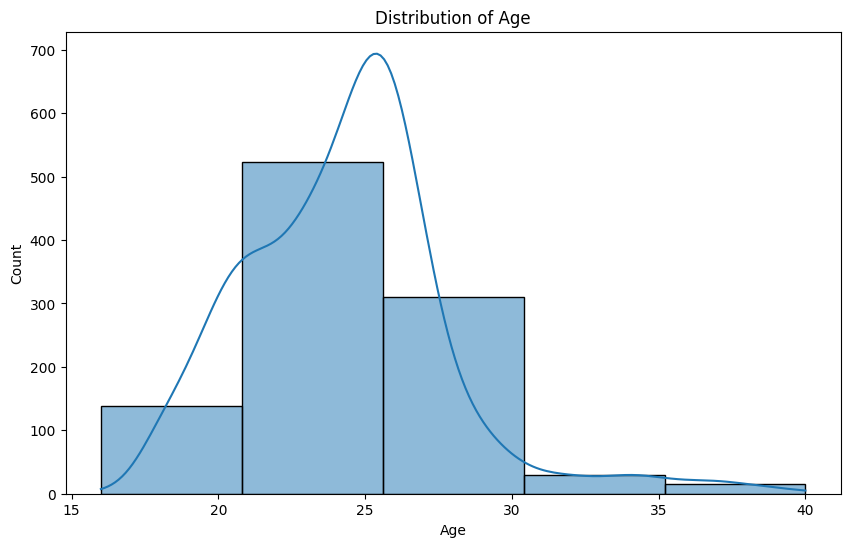

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=5)
plt.title('Distribution of Age')
plt.show()



### We can see a spike in age 25

## Daily Social Media Usage (Hours)

In [ ]:
df.head()

,Age,Gender,Hours Spent on Social Media per Day (Average),Primary Social Media Platform,Frequency of Posting in social media,Number of Friends or Followers in social media,"Academic Performance: (categorical: Good, Average, Poor)",Primary Social Media Platform
0,25,Male,3.0,Instagram,3,-1.076515,2,1
1,25,Male,3.0,Facebook,3,-1.047909,0,0
2,24,Female,3.0,Facebook,4,-0.306772,0,0
3,25,Male,1.0,Facebook,3,-0.436796,2,0
4,24,Male,3.0,Facebook,3,-1.060912,0,0


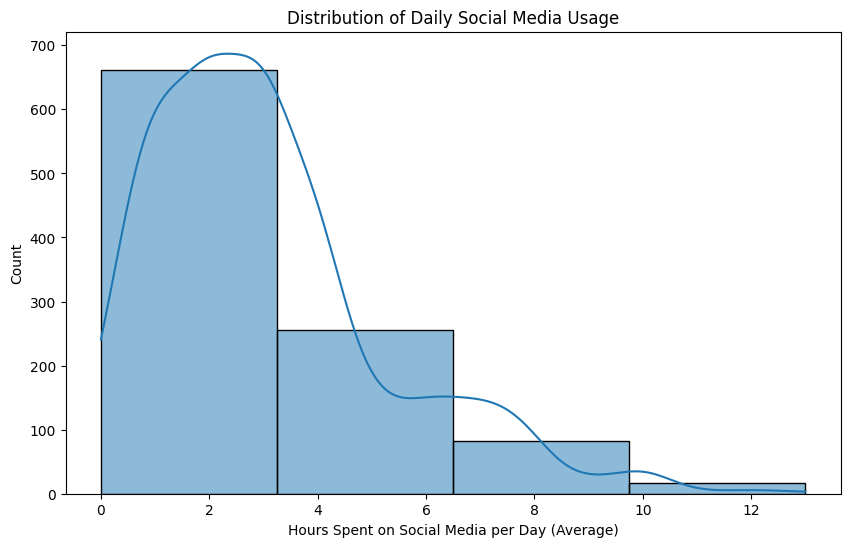

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Hours Spent on Social Media per Day (Average)'], kde=True, bins=4)
plt.title('Distribution of Daily Social Media Usage')
plt.show()


In [ ]:
df['Hours Spent on Social Media per Day (Average)'].mean()

3.0803903638151424

#### We can see about a mean of 3 hours of daily social media consumption.

## Friends or Followers

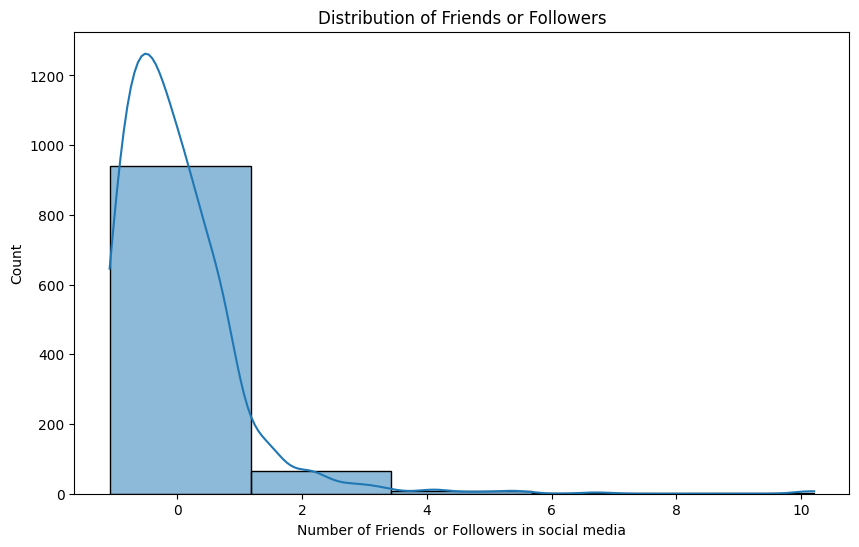

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Friends  or Followers in social media'], kde=True, bins=5)
plt.title('Distribution of Friends or Followers')
plt.show()


### There

## Boxplot for numerical variables

In [ ]:
df.head()

,Age,Gender,Hours Spent on Social Media per Day (Average),Primary Social Media Platform,Frequency of Posting in social media,Number of Friends or Followers in social media,"Academic Performance: (categorical: Good, Average, Poor)",Primary Social Media Platform
0,25,Male,3.0,Instagram,3,-1.076515,2,1
1,25,Male,3.0,Facebook,3,-1.047909,0,0
2,24,Female,3.0,Facebook,4,-0.306772,0,0
3,25,Male,1.0,Facebook,3,-0.436796,2,0
4,24,Male,3.0,Facebook,3,-1.060912,0,0


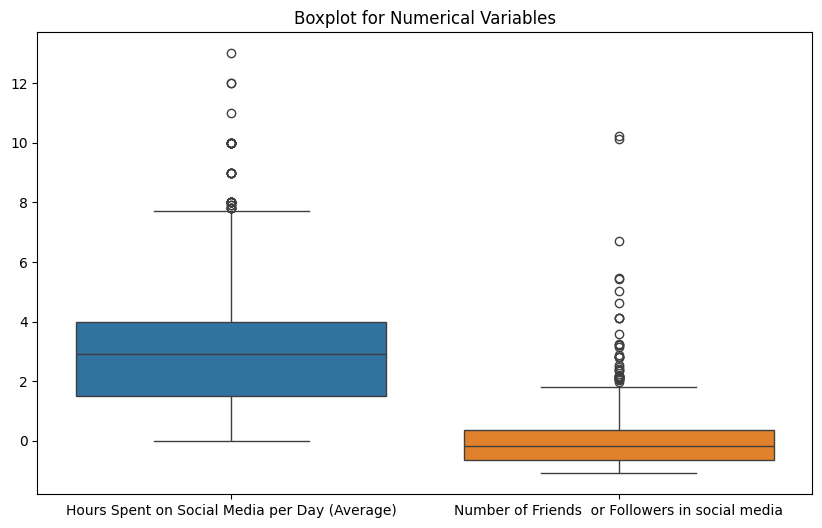

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Hours Spent on Social Media per Day (Average)', 'Number of Friends  or Followers in social media']])
plt.title('Boxplot for Numerical Variables')
plt.show()

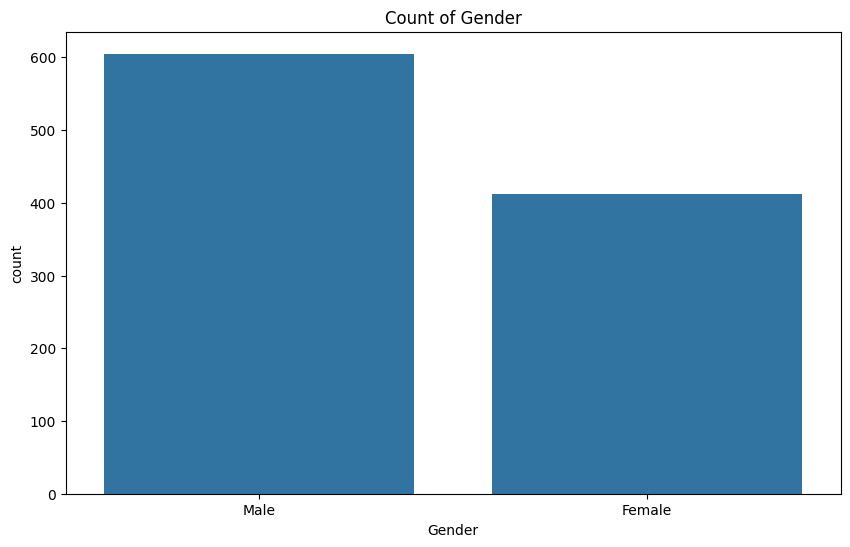

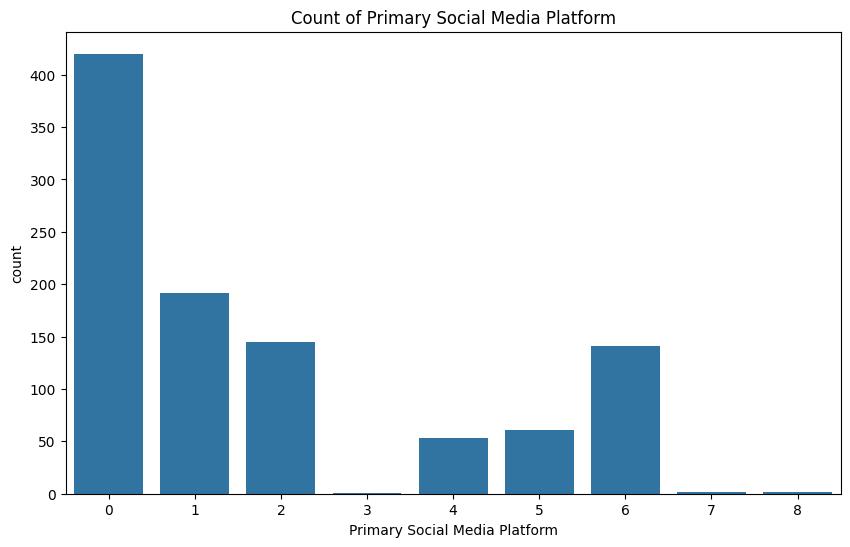

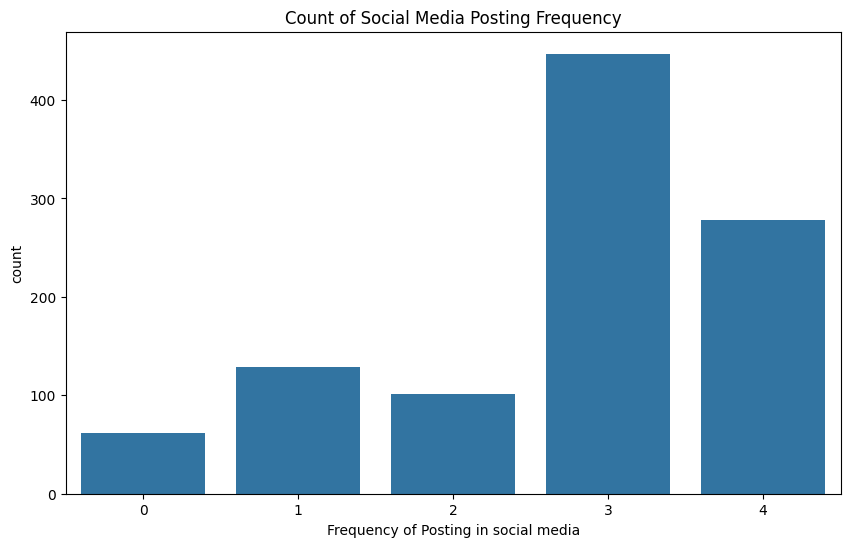

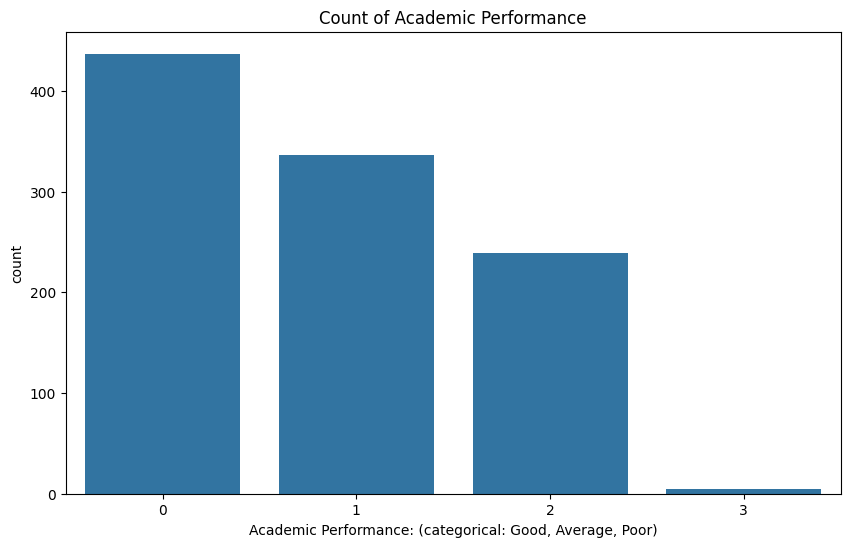

In [ ]:
# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gender'])
plt.title('Count of Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Primary Social Media Platform'])
plt.title('Count of Primary Social Media Platform')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Frequency of Posting in social media'])
plt.title('Count of Social Media Posting Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Academic Performance: (categorical: Good, Average, Poor)'])
plt.title('Count of Academic Performance')
plt.show()


# ---------------- BIVARIATE ANALYSIS ----------------

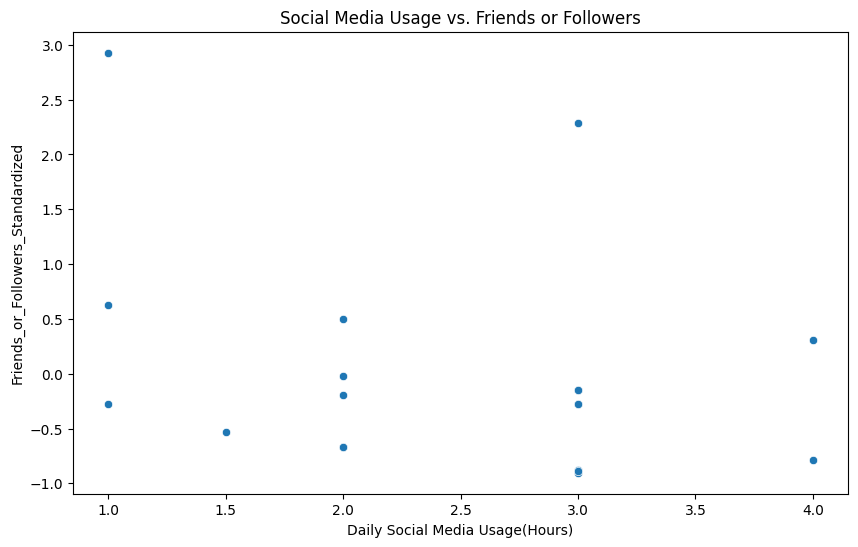

In [ ]:
# Scatter plot: Social Media Usage vs. Friends or Followers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Daily Social Media Usage(Hours)'], y=df['Friends_or_Followers_Standardized'])
plt.title('Social Media Usage vs. Friends or Followers')
plt.show()


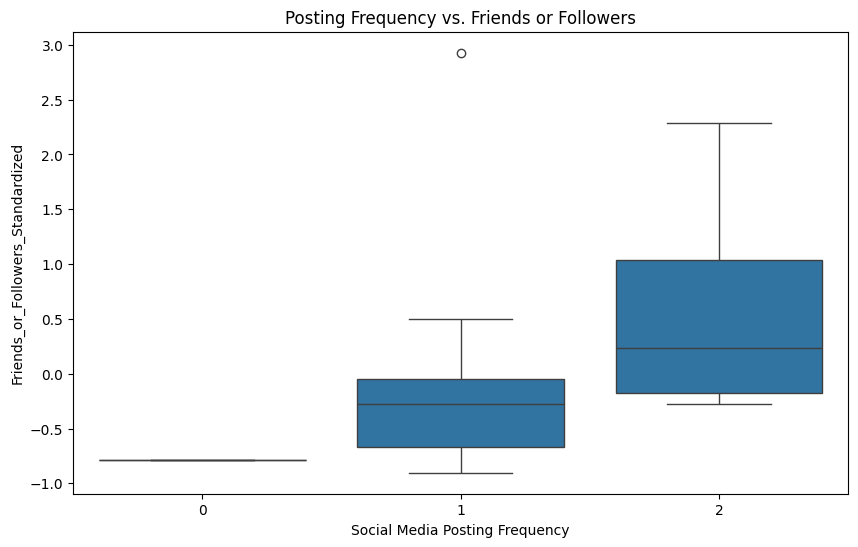

In [ ]:
# Box plot: Posting Frequency vs. Friends or Followers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Social Media Posting Frequency'], y=df['Friends_or_Followers_Standardized'])
plt.title('Posting Frequency vs. Friends or Followers')
plt.show()



  More Friends have a corelation with more social media posting

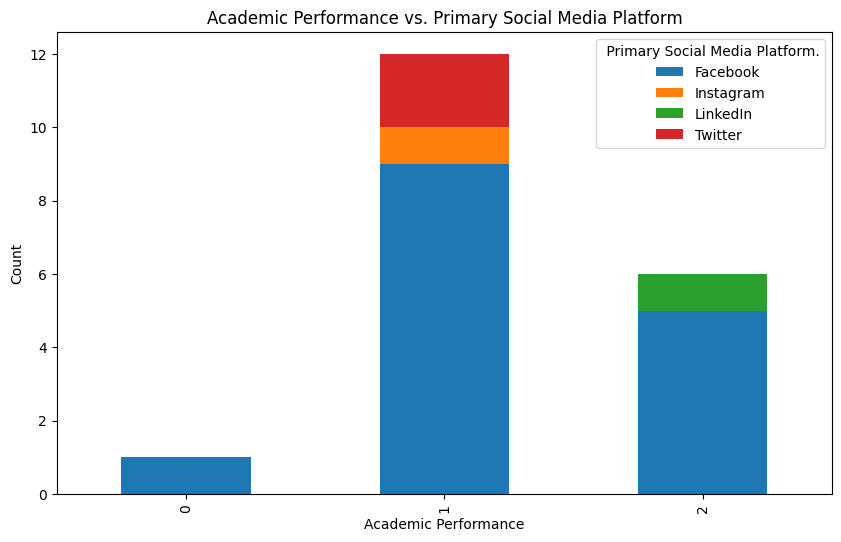

In [ ]:
# Cross-tabulation of Academic Performance vs. Primary Social Media Platform
performance_platform = pd.crosstab(df['Academic Performance'], df[' Primary Social Media Platform.'])
performance_platform.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Academic Performance vs. Primary Social Media Platform')
plt.xlabel('Academic Performance')
plt.ylabel('Count')
plt.show()


### Not particular any common pattern for Academic perfomance and social media.

# ---------------- MULTIVARIATE ANALYSIS ----------------

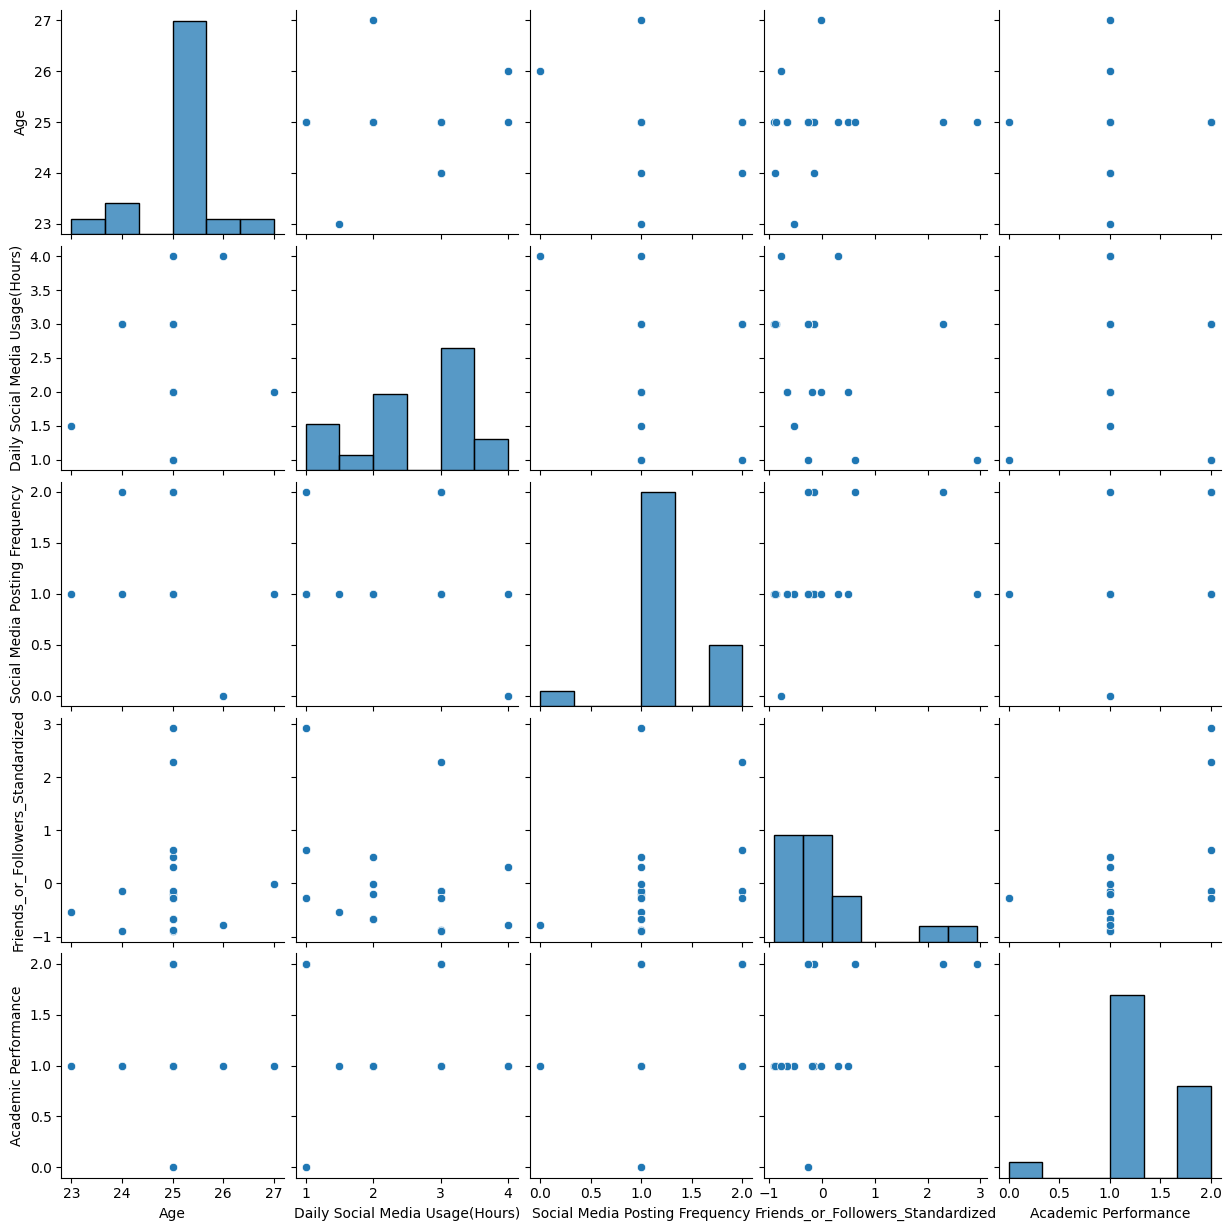

In [ ]:
sns.pairplot(df[['Age', 'Daily Social Media Usage(Hours)', 'Social Media Posting Frequency', 'Friends_or_Followers_Standardized', 'Academic Performance']])
plt.show()

### Here I can not find any common pattern

# Clustering Algorithms

In [ ]:
df.columns

Index(['Age', 'Gender', 'Hours Spent on Social Media per Day (Average)',
       ' Primary Social Media Platform',
       'Frequency of Posting in social media',
       'Number of Friends  or Followers in social media',
       'Academic Performance: (categorical: Good, Average, Poor)',
       'Primary Social Media Platform'],
      dtype='object')

In [ ]:

from sklearn.cluster import KMeans

# Select features for clustering (exclude non-numeric or irrelevant columns)
features = ['Age', 'Hours Spent on Social Media per Day (Average)', 'Number of Friends  or Followers in social media', 'Frequency of Posting in social media', 'Academic Performance: (categorical: Good, Average, Poor)', 'Primary Social Media Platform']
X = df[features]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Print cluster assignments
print(df['Cluster'])


0       0
1       0
2       1
3       0
4       1
       ..
1014    1
1015    0
1016    0
1017    0
1018    1
Name: Cluster, Length: 1017, dtype: int32


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.25696133440157665


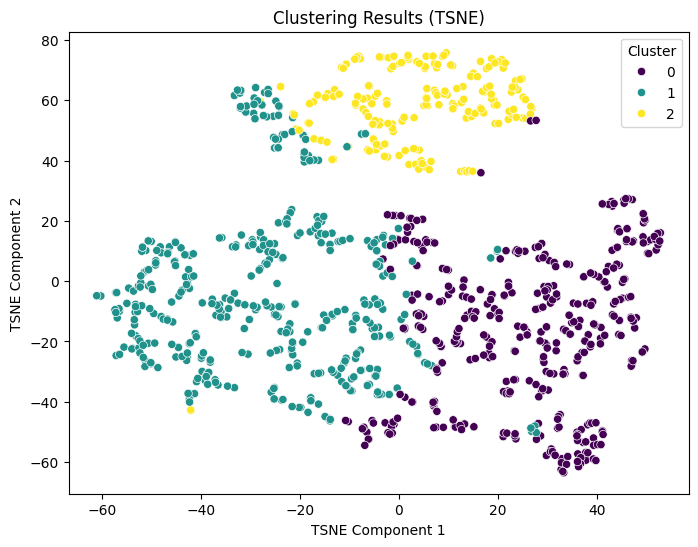

In [ ]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Choose a dimensionality reduction method (PCA or t-SNE)
#method = 'pca'  # or 'tsne'
method = 'tsne'

if method == 'pca':
    # Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_reduced = pca.fit_transform(X)
elif method == 'tsne':
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=0, perplexity=10)
    X_reduced = tsne.fit_transform(X)

# Visualize the clustering results in the reduced-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['Cluster'], palette='viridis')
plt.title(f'Clustering Results ({method.upper()})')
plt.xlabel(f'{method.upper()} Component 1')
plt.ylabel(f'{method.upper()} Component 2')
plt.show()

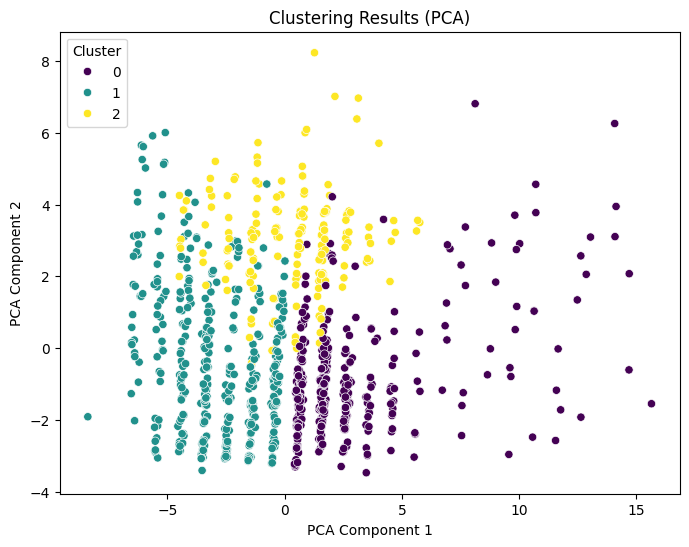

In [ ]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Choose a dimensionality reduction method (PCA or t-SNE)
#method = 'pca'  # or 'tsne'
method = 'pca'

if method == 'pca':
    # Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_reduced = pca.fit_transform(X)
elif method == 'tsne':
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=0, perplexity=10)
    X_reduced = tsne.fit_transform(X)

# Visualize the clustering results in the reduced-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['Cluster'], palette='viridis')
plt.title(f'Clustering Results ({method.upper()})')
plt.xlabel(f'{method.upper()} Component 1')
plt.ylabel(f'{method.upper()} Component 2')
plt.show()

# **Summary Analysis**

This notebook performs an analysis of a dataset combining social media usage and academic factors, using the K-means clustering algorithm. The analysis can be broken down into the following steps:

1.  **Data Loading and Initial Exploration**:
    *   The notebook begins by importing necessary libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn`.
    *   It loads an Excel file into a pandas DataFrame.
    *   Initial exploration includes displaying the columns, `info()`, and unique values of categorical columns.

2.  **Data Preprocessing**:
    *   **Cleaning**:
        *   Inconsistent values in `Primary Social Media Platform` are standardized.
        *   Values in the `Gender` column are simplified to `Male` and `Female`.
        *   The `Number of Friends or Followers` column is cleaned by extracting numerical values and converting them to integers. Rows with missing values are dropped.
        *   Inconsistent values in `Frequency of Posting` are standardized.
    *   **Label Encoding**:
        *   Categorical features like `Frequency of Posting`, `Academic Performance`, and `Primary Social Media Platform` are converted into numerical values using Label Encoding.
    *   **Standardizing**:
        *   The `Number of Friends or Followers` column is standardized using `StandardScaler`.
    *   The `Major` column is dropped from the dataframe.

3.  **Univariate Analysis**:
    *   Histograms and boxplots are used to visualize the distributions of numerical features such as `Age`, `Daily Social Media Usage`, and `Number of Friends or Followers`.
    *   Count plots are used to show the distribution of categorical variables like `Gender`, `Primary Social Media Platform`, `Frequency of Posting`, and `Academic Performance`.
    *   The mean of `Hours Spent on Social Media` is calculated.

4.  **Bivariate Analysis**:
    *   Scatter plots and box plots are used to find correlations between two variables, such as `Daily Social Media Usage` vs. `Number of Friends or Followers` and `Social Media Posting Frequency` vs. `Number of Friends or Followers`.
    *   Cross-tabulation and a stacked bar chart are used to explore the relationship between `Academic Performance` and `Primary Social Media Platform`.

5.  **Multivariate Analysis**:
    *   Pair plots are used to find relations between different numerical variables in the dataset.

6.  **K-Means Clustering**:
    *   The K-Means algorithm is applied to group the data points into 3 clusters using features like `Age`, `Daily Social Media Usage`, `Number of Friends or Followers`, `Frequency of Posting`, `Academic Performance`, and `Primary Social Media Platform`.
    *   The silhouette score is calculated to determine how well the data points are clustered.
    *   Dimensionality reduction is performed using PCA and t-SNE to visualize the clusters, and scatter plots are used for visualization of clusters.

7.  **Observations and Conclusions**:
    *   The notebook identifies that there is an imbalance in cluster assignments with the majority of data points falling into a single cluster.
    *   It also mentions that more tuning with different cluster values does not produce a better clustering.
    *   The analysis points out that the data might not be enough to draw a clear conclusion or the features might not be suitable for clustering.

**Reason for Using K-Means Clustering**

The K-means clustering algorithm is used in this notebook for the following reasons:

*   **Unsupervised Learning**: K-means is an unsupervised learning algorithm, meaning it does not require pre-labeled data. The goal is to discover underlying patterns or groupings within the data based on the features, without any prior knowledge of the groups. In this case, the goal is to find groups of users with similar social media usage patterns, academic performance, or other relevant characteristics.
*   **Segmentation**: The main goal is to segment the dataset into distinct groups (clusters) to explore the different types of users based on their social media behavior and academic performance. This could help find hidden trends and patterns in the dataset.
*   **Pattern Discovery**: K-means can help uncover potential patterns and similarities that might not be apparent through basic descriptive statistics or bivariate analysis. This can provide deeper insights into the dataset and generate further analysis directions.
*   **Simplicity**: K-means is relatively simple to implement and understand, making it a suitable starting point for clustering analysis, especially when the number of clusters is not initially known and needs to be determined through multiple iterations.

In summary, the notebook uses K-means clustering to identify and analyze patterns and groupings within a dataset combining social media usage and academic factors. While there are some challenges with the current clustering results, the analysis provides a foundation for further exploration and insights into the data.